In [1]:
import pm4py.objects.conversion.log.converter as log_converter
import pm4py.algo.discovery.alpha.algorithm as alpha_miner
import pm4py.visualization.petri_net.visualizer  as pn_visualizer
import pm4py.algo.analysis.workflow_net.algorithm as wf_net
import pm4py.objects.petri_net.utils as petri_utils
import pm4py.objects.log.importer.xes.importer as xes_importer
import pm4py
import pandas as pd

#Path to the dataset file
event_log_path = "data/BPI_Challenge_2013_incidents.xes" 


#Step 1: Import the event log
def import_event_log(file_path):
    print("\n--->Step 1: Importing the event log")
    event_log = xes_importer.apply(file_path)

    return event_log

#Step 2: Discover a Petri net from the log
def discover_petri_net_inductive(event_log):
    print("Discovering Petri net by inductive...")
    net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(event_log)
    return net, initial_marking, final_marking

def discover_petri_net_Heuristic(event_log):
    print("Discovering Petri net by Heuristic...")
    net, initial_marking, final_marking = pm4py.discovery.discover_petri_net_heuristics(event_log)
    return net, initial_marking, final_marking

def discover_petri_net_alpha(event_log):
    print("Discovering Petri net by Heuristic...")
    net, initial_marking, final_marking = pm4py.discovery.discover_petri_net_alpha(event_log)
    return net, initial_marking, final_marking

#Step 3: Visualize the Petri net
def visualize_petri_net(net, initial_marking, final_marking):
    print("\n--->Step 3: Visualize the Petri net")
    gviz = pn_visualizer.apply(net, initial_marking, final_marking)
    pn_visualizer.view(gviz)
    print("Petri net visualization complete.")

# Step 4: Split the net in train and test and check the properties of the Petri net
def checking_petri_net_properties(net, initial_marking, final_marking, event_log_test):
    print("\n--->Step 4: Checking the properties of the Petri net")
    
    # Check the properties of the Petri net
    print("Number of places:", len(net.places))
    print("Number of transitions:", len(net.transitions))
    print("Number of arcs:", len(net.arcs))
    print("Initial marking:", initial_marking)
    print("Final marking:", final_marking)
    print("The petri net is a workflow net? ", wf_net.apply(net))
    print("Soundness: ",pm4py.analysis.check_soundness(net, initial_marking, final_marking)[0])
    #petri_net_invisible_transition = pm4py.analysis.reduce_petri_net_invisibles(net)
    #visualize_petri_net(petri_net_invisible_transition, initial_marking, final_marking)
    # print("Maximal decomposition: ",pm4py.analysis.maximal_decomposition(net, initial_marking, final_marking))
    print("Precision: ",pm4py.algo.evaluation.precision.algorithm.apply(event_log_test, net, initial_marking, final_marking))
    print("Simplicity: ",pm4py.algo.evaluation.simplicity.algorithm.apply(net))
    print("Replay fitness: ",pm4py.algo.evaluation.replay_fitness.algorithm.apply(event_log_test, net, initial_marking, final_marking))
    print("Generalization: ",pm4py.algo.evaluation.generalization.algorithm.apply(event_log, net, initial_marking, final_marking))
    #df_diagnostics = pm4py.conformance_diagnostics_token_based_replay(event_log, net, initial_marking, final_marking, return_diagnostics_dataframe=True)
    #print("Conformance dignostics token based reply: ",df_diagnostics)
    #df_diagnostics.to_csv("data/conformance_diagnostics.csv")  

# PROCESS MINING

Process Mining with PM4Py: Discovering a Petri net from an event log

--->Step 1: Importing the event log


c:\Users\nikba\Desktop\roba\uni\fm\esame\ProcessMiningPetriNet\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
parsing log, completed traces :: 100%|██████████| 7554/7554 [00:01<00:00, 4122.12it/s]


Discovery the Petri net with INDUCTIVE MINER
Discovering Petri net by inductive...

--->Step 4: Checking the properties of the Petri net
Number of places: 14
Number of transitions: 18
Number of arcs: 40
Initial marking: ['source:1']
Final marking: ['sink:1']
The petri net is a workflow net?  True
Soundness:  True


computing precision with alignments, completed variants :: 100%|██████████| 3048/3048 [00:22<00:00, 135.98it/s]


Precision:  0.7011431558373673
Simplicity:  0.6666666666666666


aligning log, completed variants :: 100%|██████████| 411/411 [00:03<00:00, 134.36it/s]


Replay fitness:  {'percFitTraces': 99.73509933774834, 'averageFitness': 0.9995986898934639, 'percentage_of_fitting_traces': 99.73509933774834, 'average_trace_fitness': 0.9995986898934639, 'log_fitness': 0.9995842151427178}


replaying log with TBR, completed traces :: 100%|██████████| 1511/1511 [00:01<00:00, 773.83it/s] 


Generalization:  0.9087999307616752

--->Step 3: Visualize the Petri net


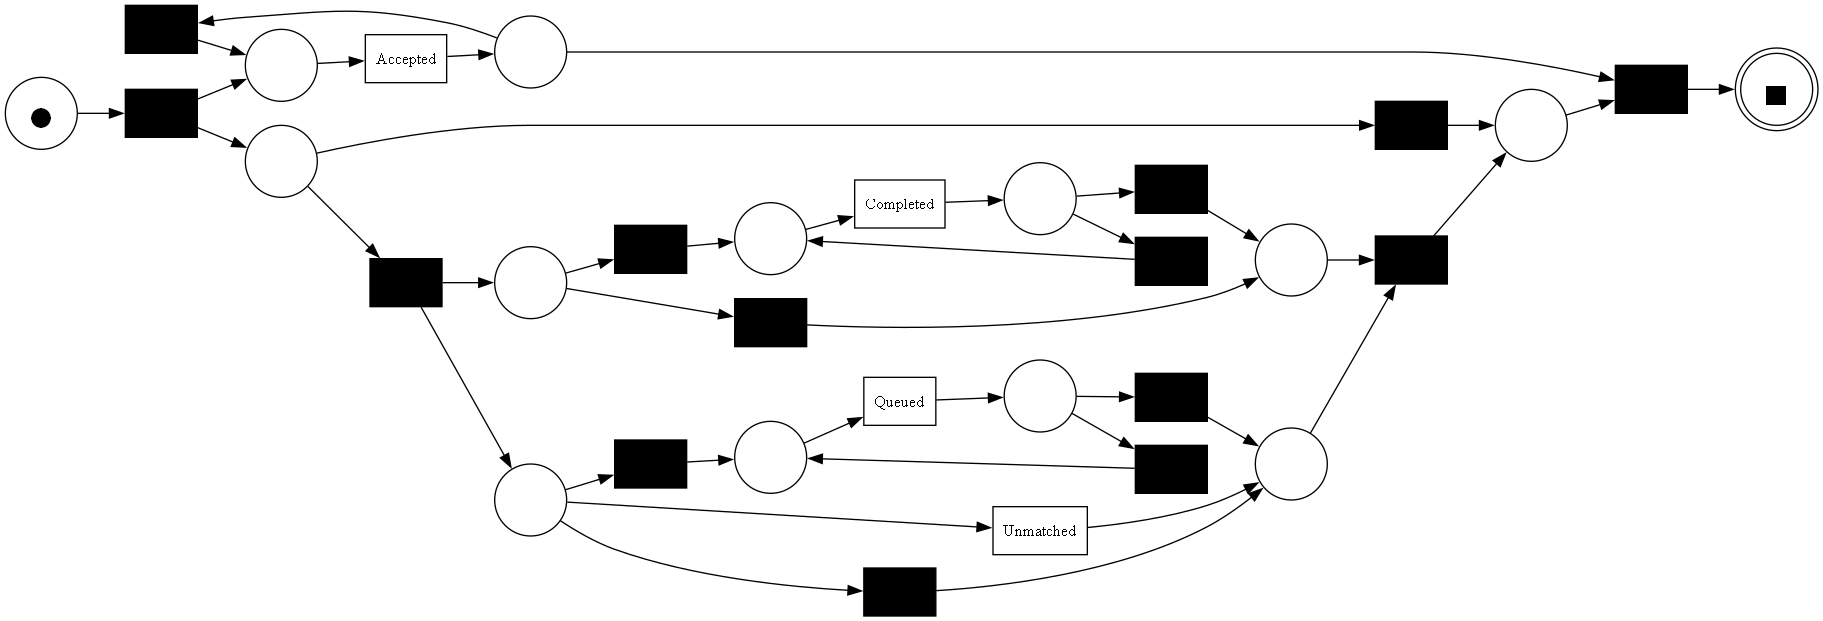

Petri net visualization complete.
Discovery the Petri net with HEURISTIC MINER
Discovering Petri net by Heuristic...

--->Step 4: Checking the properties of the Petri net
Number of places: 8
Number of transitions: 15
Number of arcs: 30
Initial marking: ['source0:1']
Final marking: ['sink0:1']
The petri net is a workflow net?  True
Soundness:  True


computing precision with alignments, completed variants :: 100%|██████████| 3048/3048 [00:04<00:00, 671.70it/s]


Precision:  0.8512515326415264
Simplicity:  0.6216216216216216


aligning log, completed variants :: 100%|██████████| 411/411 [00:01<00:00, 268.74it/s]


Replay fitness:  {'percFitTraces': 93.44370860927152, 'averageFitness': 0.9946304683755992, 'percentage_of_fitting_traces': 93.44370860927152, 'average_trace_fitness': 0.9946304683755992, 'log_fitness': 0.992218133497303}


replaying log with TBR, completed traces :: 100%|██████████| 1511/1511 [00:00<00:00, 1618.09it/s]


Generalization:  0.9024161645591694

--->Step 3: Visualize the Petri net


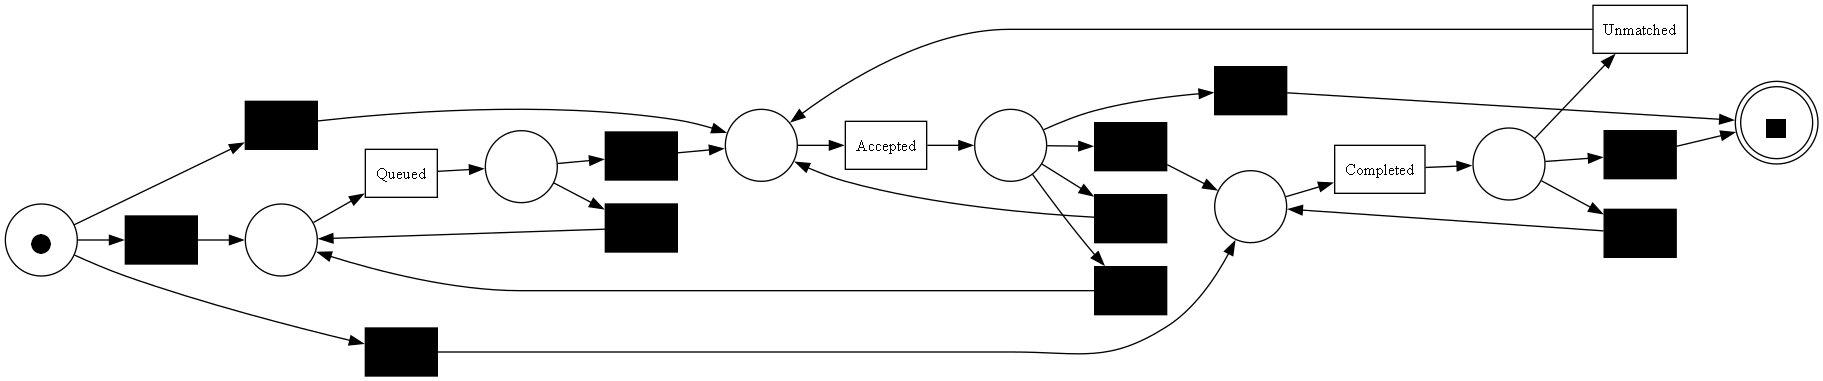

Petri net visualization complete.
Discovery the Petri net with ALPHA MINER
Discovering Petri net by Heuristic...

--->Step 4: Checking the properties of the Petri net
Number of places: 2
Number of transitions: 4
Number of arcs: 5
Initial marking: ['start:1']
Final marking: ['end:1']
The petri net is a workflow net?  False
Soundness:  False


computing precision with alignments, completed variants :: 100%|██████████| 3048/3048 [00:01<00:00, 1830.83it/s]


Precision:  0.6
Simplicity:  1.0


aligning log, completed variants :: 100%|██████████| 411/411 [00:00<00:00, 869.44it/s]


Replay fitness:  {'percFitTraces': 0.0, 'averageFitness': 0.29698696121349555, 'percentage_of_fitting_traces': 0.0, 'average_trace_fitness': 0.29698696121349555, 'log_fitness': 0.2072986692276032}


replaying log with TBR, completed traces :: 100%|██████████| 1511/1511 [00:00<00:00, 3012.36it/s]


Generalization:  0.8824986163548602

--->Step 3: Visualize the Petri net


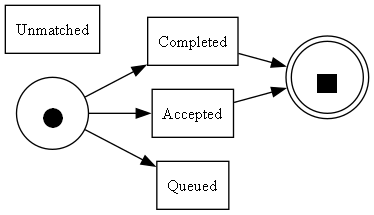

Petri net visualization complete.


In [2]:
print("Process Mining with PM4Py: Discovering a Petri net from an event log")

# Import the event log
event_log = import_event_log(event_log_path)
(event_log_train, event_log_test) = pm4py.ml.split_train_test(event_log)

# Discover the Petri net with INDUCTIVE MINER
print("Discovery the Petri net with INDUCTIVE MINER")
net, initial_marking, final_marking = discover_petri_net_inductive(event_log_train)
# Check the properties of the Petri net 
checking_petri_net_properties(net, initial_marking, final_marking, event_log_test)
# Visualize the Petri net
visualize_petri_net(net, initial_marking, final_marking)

# Discovery the Petri net with HEURISTIC MINER
print("Discovery the Petri net with HEURISTIC MINER")
net, initial_marking, final_marking = discover_petri_net_Heuristic(event_log_train)
# Check the properties of the Petri net
checking_petri_net_properties(net, initial_marking, final_marking, event_log_test)
# Visualize the Petri net
visualize_petri_net(net, initial_marking, final_marking)

# Discovery the Petri net with ALPHA MINER
print("Discovery the Petri net with ALPHA MINER")
net, initial_marking, final_marking = discover_petri_net_alpha(event_log_train)
# Check the properties of the Petri net
checking_petri_net_properties(net, initial_marking, final_marking, event_log_test)
# Visualize the Petri net
visualize_petri_net(net, initial_marking, final_marking)

# PRE-PROCESSING

We first print the first 5 events in the dataset

In [3]:
df = pm4py.convert_to_dataframe(event_log)
print(df.head())

  org:group resource country organization country org:resource  \
0       V30           France                   fr     Frederic   
1       V30           France                   fr     Frederic   
2    V5 3rd           France                   fr     Frederic   
3    V5 3rd           France                   fr  Anne Claire   
4       V30           France                   fr  Anne Claire   

  organization involved org:role concept:name  impact  product  \
0           Org line A2     A2_4     Accepted  Medium  PROD582   
1           Org line A2     A2_4     Accepted  Medium  PROD582   
2           Org line A2     A2_5       Queued  Medium  PROD582   
3           Org line A2     A2_5     Accepted  Medium  PROD582   
4           Org line A2     A2_4       Queued  Medium  PROD582   

  lifecycle:transition            time:timestamp case:concept:name  
0          In Progress 2010-03-31 16:59:42+00:00       1-364285768  
1          In Progress 2010-03-31 17:00:56+00:00       1-364285768  

Then we print some statistical data about the cases, the events, the lifecycle transitions and the resources

In [4]:
df = pm4py.convert_to_dataframe(event_log)
print("Concept:name (event)\n",df["concept:name"].describe())
print("\n\ncase:concept:name (case)\n",df["case:concept:name"].describe())
print("\n\nlifecycle:transition (step of the event)\n",df["lifecycle:transition"].describe())
print("\n\nResource\n",df["org:resource"].describe())

Concept:name (event)
 count        65533
unique           4
top       Accepted
freq         40117
Name: concept:name, dtype: object


case:concept:name (case)
 count           65533
unique           7554
top       1-687082195
freq              123
Name: case:concept:name, dtype: object


lifecycle:transition (step of the event)
 count           65533
unique             13
top       In Progress
freq            30239
Name: lifecycle:transition, dtype: object


Resource
 count      65533
unique      1440
top       Siebel
freq        6162
Name: org:resource, dtype: object


Now we plot some data in order to see the event and lifecycle transitions distribution

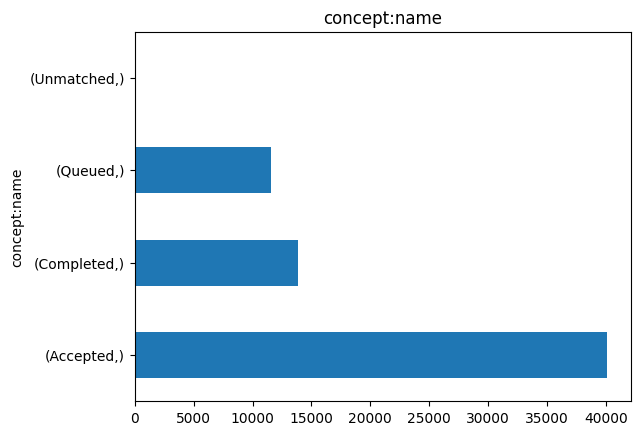

In [5]:
import matplotlib.pyplot as plt

# Value counts: concept:name
df.value_counts(subset=["concept:name"]).plot(y='concept:name', kind='barh', title='concept:name')
plt.show()

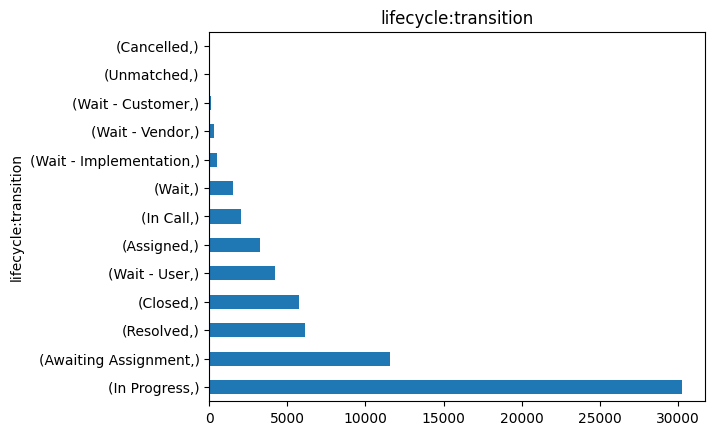

In [6]:
# Value counts: concept:name
df.value_counts(subset=["lifecycle:transition"]).plot(y='lifecycle:transition', kind='barh', title='lifecycle:transition')
plt.show()

Now we convert each timestamp (which is absolute) to a relative timestamp.

The obtained timestamps would be relative to the minimum timestamp represented in the dataset

Each timestamp is then converted in seconds, in order to being able to process this data

In [7]:
#Transform from absolute time to relative time (timestamps become relative to the minimum one present in the dataset)
#This is done to facilitate dicovery process

df['time:timestamp'] = pd.to_datetime(df['time:timestamp'])

df['time:timestamp'] = df['time:timestamp'] - df['time:timestamp'].min()

df["time:timestamp"] = df["time:timestamp"].dt.total_seconds()

print(df["time:timestamp"])

0               0.0
1              74.0
2            2766.0
3          517465.0
4          517496.0
            ...    
65528    66136081.0
65529    66146338.0
65530    66146577.0
65531    66147801.0
65532    66174885.0
Name: time:timestamp, Length: 65533, dtype: float64


Then we check the quantity of null/NaN values for each feature of the dataset, in order to remove cases for which there is a null/NaN value among all its columns

In [8]:
#check null values
print("Null values:\n",df.isna().sum())

Null values:
 org:group                   0
resource country            0
organization country        0
org:resource                0
organization involved       0
org:role                 6950
concept:name                0
impact                      0
product                     0
lifecycle:transition        0
time:timestamp              0
case:concept:name           0
dtype: int64


Now we delete the cases for which events have org:role equals to null

In [9]:
#Delete tuples with null values for org:role
#df = df.dropna(subset=['org:role'])

#get all the cases where org:role is null
cases_to_remove = df[df["org:role"].isna()]["case:concept:name"].unique()

#remove cases where org:role is null
df = df[~df["case:concept:name"].isin(cases_to_remove)]

print("Number of cases after deletion of null values:",df["case:concept:name"].unique().size)

Number of cases after deletion of null values: 6168


Now we remove all duplicated events accoring to case:concept:name (case), concept:name (event) and timestamp

In [10]:
#Delete duplicates of samples with the same case name, activity and timestamp
df = df.drop_duplicates(subset=['case:concept:name', 'concept:name', 'time:timestamp'])

Show all unique values for various columns of the dataset

In [11]:
print("resource country unique values:",df["resource country"].unique())
print("\n\nconcept name unique values:",df["concept:name"].unique())
print("\n\norg resource unique values:",df["org:resource"].unique())

resource country unique values: ['France' '0' 'Sweden' 'POLAND' 'USA' 'INDIA' 'Brazil' 'China' 'THAILAND'
 'Japan' 'Korea' 'MALAYSIA' 'Belgium' 'United Kingdom' 'Australia' 'Italy'
 'RUSSIAN FEDERATION' 'Argentina' 'Singapore' 'Canada' 'PERU' 'Germany']


concept name unique values: ['Accepted' 'Queued' 'Completed' 'Unmatched']


org resource unique values: ['Frederic' 'Anne Claire' 'Eric' ... 'Abhijit' 'Damien' 'Namita']


Now remove the cases with events that have the value 0 for resource country

In [12]:
cases_to_remove = df[df["resource country"]=="0"]["case:concept:name"].unique()

#remove cases where org:role is null
df = df[~df["case:concept:name"].isin(cases_to_remove)]

print("Number of cases after deletion of null values:",df["case:concept:name"].unique().size)

Number of cases after deletion of null values: 2113


Now we calculate, for each case, its duration as difference between the maximum timestamp of its events and the minimum timestamp

This is done to conduct a successive outliers detection analysis

Then, statistical data about case durations are showed

In [13]:
#New we percorm the outliers detection on the activity duration
#for each case (case:concept:name) we calculate how long that case is by looking at timestamps of samples with the same case:concept:name
#So we calculate the case duration and put it into a new column "case_duration"
df = df.sort_values(by=['case:concept:name', 'time:timestamp'])

#df['case_duration'] = df.groupby('case:concept:name')['time:timestamp'].diff(-1)

# Calculate the start and end timestamp for each case
case_durations = df.groupby('case:concept:name').agg(
    start_time=('time:timestamp', 'min'),  # First event (min timestamp)
    end_time=('time:timestamp', 'max')     # Last event (max timestamp)
)

# Calculate the duration for each case (end_time - start_time)
case_durations['case_duration'] = case_durations['end_time'] - case_durations['start_time']

# Merge the case durations back into the original DataFrame
df = df.merge(case_durations[['case_duration']], on='case:concept:name', how='left')

print("Case duration:\n",df['case_duration'].describe())

Case duration:
 count    8.510000e+03
mean     3.162892e+05
std      7.000899e+05
min      0.000000e+00
25%      3.670000e+02
50%      9.640000e+02
75%      3.492230e+05
max      8.533379e+06
Name: case_duration, dtype: float64


Now we conduct outliers detections to detect all the cases with an anomalous duration

To do so we calculate the first and third quartile $Q1, Q3$ among all the case durations. Then we calculate the IQR parameter and we obtain two bounds:<br>
- lower bound: $Q1 - 1.5*IQR$<br>
- upper bound: $Q3 + 1.5*IQR$<br>

Then all cases of which duration is lower than the lower bound or higher than the upper bound are considered as outliers and so are removed from the dataset

In [14]:
#then we calculate the percentile Q1, Q3 for the case_duration column, and calculate the IQR
Q1 = df['case_duration'].quantile(0.25)
Q3 = df['case_duration'].quantile(0.75)
IQR = Q3 - Q1

print("Quratile 25%:",Q1)
print("Quartile 75%:",Q3)

# Define the extremises 'outlier_lower_bound' and 'Outlier_upper_bound' such that an outliers has case_duration lower than 'outlier_lower_bound' or higher than 'outlier_upper_bound'
outlier_lower_bound = Q1 - 1.5 * IQR
outlier_upper_bound = Q3 + 1.5 * IQR
print("Lower bound for case duration:",outlier_lower_bound)
print("Upper bound for case duration:",outlier_upper_bound)

#remove whole cases that are identified as outliers accoring to their duration
df_cleaned = df[(df['case_duration'] <= outlier_upper_bound) & (df['case_duration'] >= outlier_lower_bound)]

print("New number of samples after outliers elimination:",df_cleaned.shape[0])

Quratile 25%: 367.0
Quartile 75%: 349223.0
Lower bound for case duration: -522917.0
Upper bound for case duration: 872507.0
New number of samples after outliers elimination: 7126


After the outliers removal, the number of cases remained in the dataset is the following one

In [15]:
print("Remained cases:",df_cleaned["case:concept:name"].unique().size)
print("Removed outlier cases:",df["case:concept:name"].unique().size-df_cleaned["case:concept:name"].unique().size)

Remained cases: 1998
Removed outlier cases: 115


Now we print again some value distribution after the whole prepocessing phase

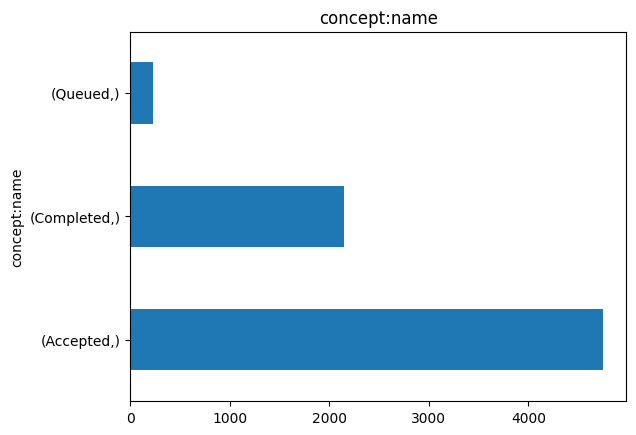

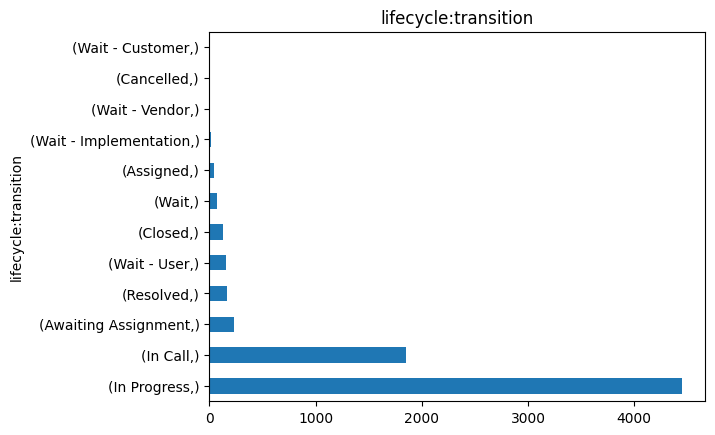

In [16]:
# Value counts: concept:name
df_cleaned.value_counts(subset=["concept:name"]).plot(y='concept:name', kind='barh', title='concept:name')
plt.show()

# Value counts: concept:name
df_cleaned.value_counts(subset=["lifecycle:transition"]).plot(y='lifecycle:transition', kind='barh', title='lifecycle:transition')
plt.show()

Lastly we show statistical data about the dataset after being preprocessed

In [17]:
print("Attrice descriptions after the preprocessing:")

print("Concept:name (event)\n",df_cleaned["concept:name"].describe())
print("\n\ncase:concept:name (case)\n",df_cleaned["case:concept:name"].describe())
print("\n\nlifecycle:transition (step of the event)\n",df_cleaned["lifecycle:transition"].describe())
print("\n\nResource\n",df_cleaned["org:resource"].describe())

Attrice descriptions after the preprocessing:
Concept:name (event)
 count         7126
unique           3
top       Accepted
freq          4747
Name: concept:name, dtype: object


case:concept:name (case)
 count            7126
unique           1998
top       1-736602448
freq               30
Name: case:concept:name, dtype: object


lifecycle:transition (step of the event)
 count            7126
unique             12
top       In Progress
freq             4447
Name: lifecycle:transition, dtype: object


Resource
 count       7126
unique       266
top       Robert
freq         149
Name: org:resource, dtype: object


# PROCESS MINING AFTER PREPROCESSING

In this phase we conduct again the process mining discovery on the preprocessed data, in order to compare the petri net and its properties with the ones obtained by using non-preprocessed data (original dataset)

In [18]:
from pm4py.convert import convert_to_event_log

df_cleaned["time:timestamp"] = pd.to_datetime(df_cleaned['time:timestamp'], unit='s')
preprocessed_event_log = convert_to_event_log(df_cleaned)

C:\Users\nikba\AppData\Local\Temp\ipykernel_47956\1339938909.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["time:timestamp"] = pd.to_datetime(df_cleaned['time:timestamp'], unit='s')


Process Mining with PM4Py: Discovering a Petri net from an event log AFTER PREPROCESSING
Discovery the Petri net with INDUCTIVE MINER
Discovering Petri net by inductive...

--->Step 4: Checking the properties of the Petri net
Number of places: 14
Number of transitions: 17
Number of arcs: 38
Initial marking: ['source:1']
Final marking: ['sink:1']
The petri net is a workflow net?  True
Soundness:  True


computing precision with alignments, completed variants :: 100%|██████████| 106/106 [00:00<00:00, 381.81it/s]


Precision:  0.8391459074733096
Simplicity:  0.6888888888888889


aligning log, completed variants :: 100%|██████████| 26/26 [00:00<00:00, 276.99it/s]


Replay fitness:  {'percFitTraces': 99.74937343358395, 'averageFitness': 0.9993734335839599, 'percentage_of_fitting_traces': 99.74937343358395, 'average_trace_fitness': 0.9993734335839599, 'log_fitness': 0.9992572000627231}


replaying log with TBR, completed traces :: 100%|██████████| 89/89 [00:00<00:00, 2236.41it/s]


Generalization:  0.8731505322025546

--->Step 3: Visualize the Petri net


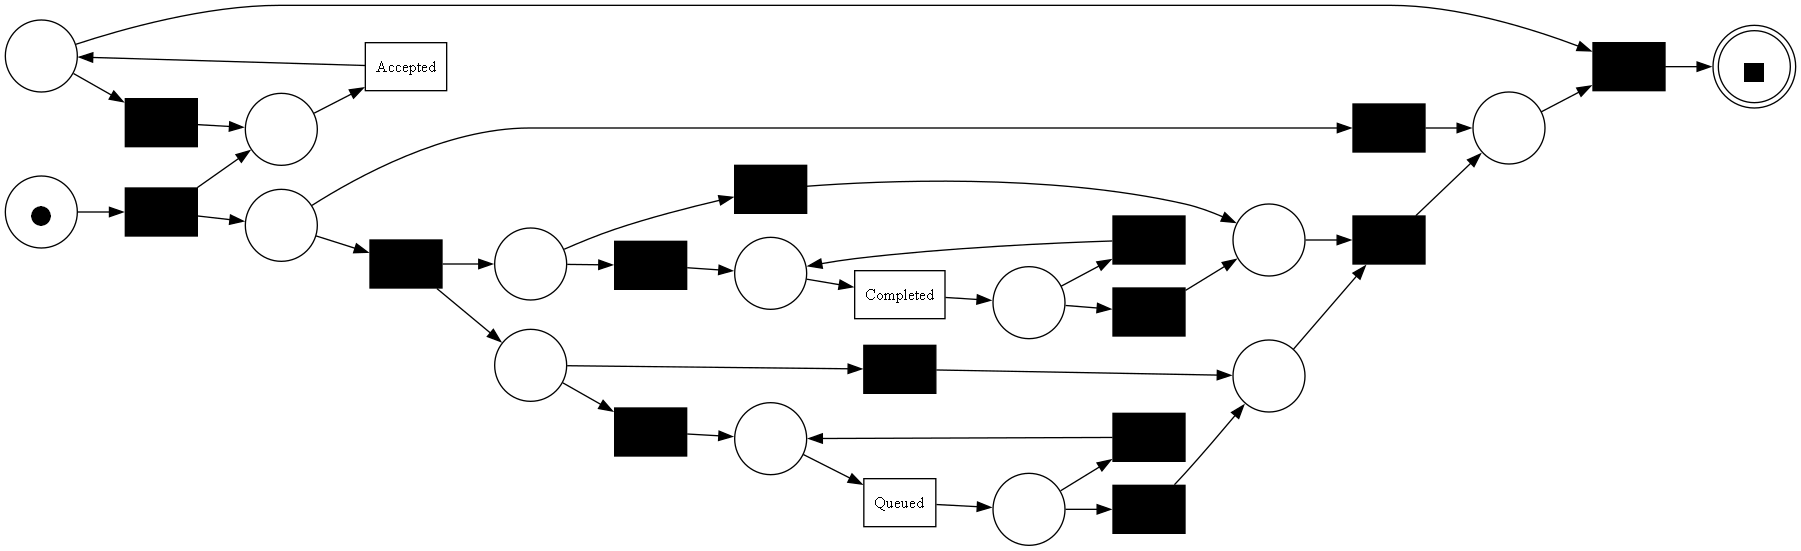

Petri net visualization complete.
Discovery the Petri net with HEURISTIC MINER
Discovering Petri net by Heuristic...

--->Step 4: Checking the properties of the Petri net
Number of places: 7
Number of transitions: 11
Number of arcs: 23
Initial marking: ['source0:1']
Final marking: ['sink0:1']
The petri net is a workflow net?  True
Soundness:  False


computing precision with alignments, completed variants :: 100%|██████████| 106/106 [00:00<00:00, 813.74it/s]


Precision:  0.8116691285081241
Simplicity:  0.6428571428571429


aligning log, completed variants :: 100%|██████████| 26/26 [00:00<00:00, 324.39it/s]


Replay fitness:  {'percFitTraces': 0.0, 'averageFitness': 0.7511711741628642, 'percentage_of_fitting_traces': 0.0, 'average_trace_fitness': 0.7511711741628642, 'log_fitness': 0.7576953635864666}


replaying log with TBR, completed traces :: 100%|██████████| 89/89 [00:00<00:00, 2894.31it/s]


Generalization:  0.8755653854403374

--->Step 3: Visualize the Petri net


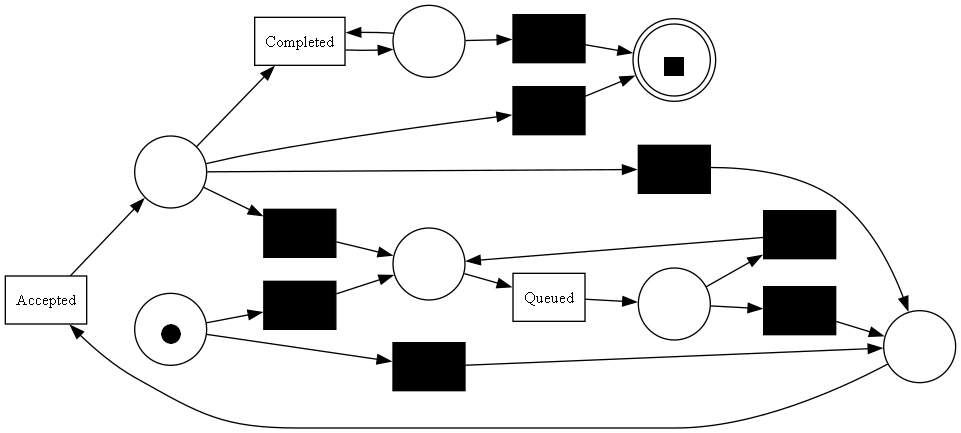

Petri net visualization complete.
Discovery the Petri net with ALPHA MINER
Discovering Petri net by Heuristic...

--->Step 4: Checking the properties of the Petri net
Number of places: 2
Number of transitions: 3
Number of arcs: 4
Initial marking: ['start:1']
Final marking: ['end:1']
The petri net is a workflow net?  False
Soundness:  False


computing precision with alignments, completed variants :: 100%|██████████| 106/106 [00:00<00:00, 4283.82it/s]


Precision:  0.9968847352024922
Simplicity:  1.0


aligning log, completed variants :: 100%|██████████| 26/26 [00:00<00:00, 1310.83it/s]


Replay fitness:  {'percFitTraces': 0.0, 'averageFitness': 0.4758610711717161, 'percentage_of_fitting_traces': 0.0, 'average_trace_fitness': 0.4758610711717161, 'log_fitness': 0.4517738359201774}


replaying log with TBR, completed traces :: 100%|██████████| 89/89 [00:00<00:00, 4490.42it/s]

Generalization:  0.9659920905542132

--->Step 3: Visualize the Petri net


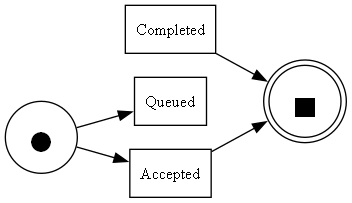

Petri net visualization complete.


In [19]:
print("Process Mining with PM4Py: Discovering a Petri net from an event log AFTER PREPROCESSING")

# Import the event log
event_log = preprocessed_event_log
(event_log_train, event_log_test) = pm4py.ml.split_train_test(event_log)

# Discover the Petri net with INDUCTIVE MINER
print("Discovery the Petri net with INDUCTIVE MINER")
net, initial_marking, final_marking = discover_petri_net_inductive(event_log_train)
# Check the properties of the Petri net 
checking_petri_net_properties(net, initial_marking, final_marking, event_log_test)
# Visualize the Petri net
visualize_petri_net(net, initial_marking, final_marking)

# Discovery the Petri net with HEURISTIC MINER
print("Discovery the Petri net with HEURISTIC MINER")
net, initial_marking, final_marking = discover_petri_net_Heuristic(event_log_train)
# Check the properties of the Petri net
checking_petri_net_properties(net, initial_marking, final_marking, event_log_test)
# Visualize the Petri net
visualize_petri_net(net, initial_marking, final_marking)

# Discovery the Petri net with ALPHA MINER
print("Discovery the Petri net with ALPHA MINER")
net, initial_marking, final_marking = discover_petri_net_alpha(event_log_train)
# Check the properties of the Petri net
checking_petri_net_properties(net, initial_marking, final_marking, event_log_test)
# Visualize the Petri net
visualize_petri_net(net, initial_marking, final_marking)

# DATA AUGMENTATION WITH GPT

We asked Chat GPT to augment the dataset by using the following prompt:"Augment the dataset given in the provided file, by creating new consistent data, basing on the data that already exists in the dataset"

The response was the following code:

In [20]:
from datetime import datetime, timedelta
import random
 
# Provided dataset structure
base_data = {
    "org:group": ["V30", "V5 3rd", "V13 2nd 3rd", "S42", "N52 2nd", "O3 3rd", "G140 2nd", "M25"],
    "resource": ["Frederic", "Anne Claire", "Eric", "Sarah", "Loic", "Adam", "Denny", "Paul", "Åse", "Joseph", "Björn T", "Suliman", "Jon", "Gustav", "Magnus"],
    "country": ["France", "Sweden"],
    "organization country": ["fr", "se"],
    "org:resource": ["Frederic", "Anne Claire", "Eric", "Adam", "Denny", "Paul", "Åse", "Joseph", "Björn T", "Suliman", "Jon", "Gustav", "Magnus"],
    "organization involved": ["Org line A2", "Org line C", "Org line B3", "Org line D"],
    "org:role": ["A2_4", "A2_5", "B3_1", "V3_2", "E_10", "C_6"],
    "concept:name": ["Accepted", "Queued", "Completed", "Unmatched"],
    "impact": ["Medium"],
    "product": ["PROD582", "PROD453", "PROD613"],
    "lifecycle:transition": ["In Progress", "Awaiting Assignment", "Assigned", "Resolved", "Closed", "Wait - User"],
    "case:concept:name": ["1-364285768", "2-467153946", "3-582936478", "4-731926543"],
}
 
# Generate synthetic data
def generate_synthetic_data(base_data, num_entries=50):
    new_data = []
    start_time = datetime(2010, 3, 31, 16, 0)  # Example start timestamp
 
    for i in range(num_entries):
        # Generate random case ID to introduce new cases
        case_id = f"{random.randint(5, 999)}-{random.randint(100000000, 999999999)}"
        case_duration = random.randint(20000, 100000000)  # Random case duration
 
        entry = {
            "org:group": random.choice(base_data["org:group"]),
            "resource": random.choice(base_data["resource"]),
            "country": random.choice(base_data["country"]),
            "organization country": "fr" if random.choice(base_data["country"]) == "France" else "se",
            "org:resource": random.choice(base_data["org:resource"]),
            "organization involved": random.choice(base_data["organization involved"]),
            "org:role": random.choice(base_data["org:role"]),
            "concept:name": random.choice(base_data["concept:name"]),
            "impact": base_data["impact"][0],
            "product": random.choice(base_data["product"]),
            "lifecycle:transition": random.choice(base_data["lifecycle:transition"]),
            "time:timestamp": (start_time + timedelta(seconds=random.randint(0, case_duration))).isoformat(),
            "case:concept:name": case_id,
            "case_duration": case_duration,
        }
 
        new_data.append(entry)
 
    return pd.DataFrame(new_data)
 
# Generate 100 synthetic rows
synthetic_data = generate_synthetic_data(base_data, num_entries=100)
 
synthetic_data['time:timestamp'] = pd.to_datetime(synthetic_data['time:timestamp'])
 
# Display sample of augmented data
print(synthetic_data.head())
 

  org:group  resource country organization country org:resource  \
0   N52 2nd  Frederic  France                   fr       Magnus   
1    O3 3rd    Gustav  France                   fr       Magnus   
2       M25    Gustav  France                   fr      Björn T   
3  G140 2nd       Åse  Sweden                   se          Jon   
4       V30     Denny  Sweden                   se          Åse   

  organization involved org:role concept:name  impact  product  \
0            Org line D      C_6    Unmatched  Medium  PROD613   
1           Org line B3      C_6    Unmatched  Medium  PROD582   
2           Org line A2     A2_5     Accepted  Medium  PROD453   
3           Org line A2     E_10     Accepted  Medium  PROD613   
4            Org line D     E_10    Completed  Medium  PROD582   

  lifecycle:transition      time:timestamp case:concept:name  case_duration  
0               Closed 2011-08-01 23:02:31     181-481855074       49796856  
1             Assigned 2010-05-14 01:48:57  

In [21]:
df_incremented_GPT = pd.concat([df_cleaned,synthetic_data]) 

In [22]:
GPT_event_log = convert_to_event_log(df_incremented_GPT) 

Process Mining with PM4Py: Discovering a Petri net from an event log AFTER PREPROCESSING
Discovery the Petri net with INDUCTIVE MINER
Discovering Petri net by inductive...

--->Step 4: Checking the properties of the Petri net
Number of places: 16
Number of transitions: 20
Number of arcs: 44
Initial marking: ['source:1']
Final marking: ['sink:1']
The petri net is a workflow net?  True
Soundness:  True


computing precision with alignments, completed variants :: 100%|██████████| 118/118 [00:00<00:00, 196.46it/s]


Precision:  0.7682512733446519
Simplicity:  0.6923076923076922


aligning log, completed variants :: 100%|██████████| 26/26 [00:00<00:00, 201.61it/s]


Replay fitness:  {'percFitTraces': 100.0, 'averageFitness': 1.0, 'percentage_of_fitting_traces': 100.0, 'average_trace_fitness': 1.0, 'log_fitness': 0.999696358531127}


replaying log with TBR, completed traces :: 100%|██████████| 92/92 [00:00<00:00, 2434.36it/s]


Generalization:  0.9424891796207234

--->Step 3: Visualize the Petri net


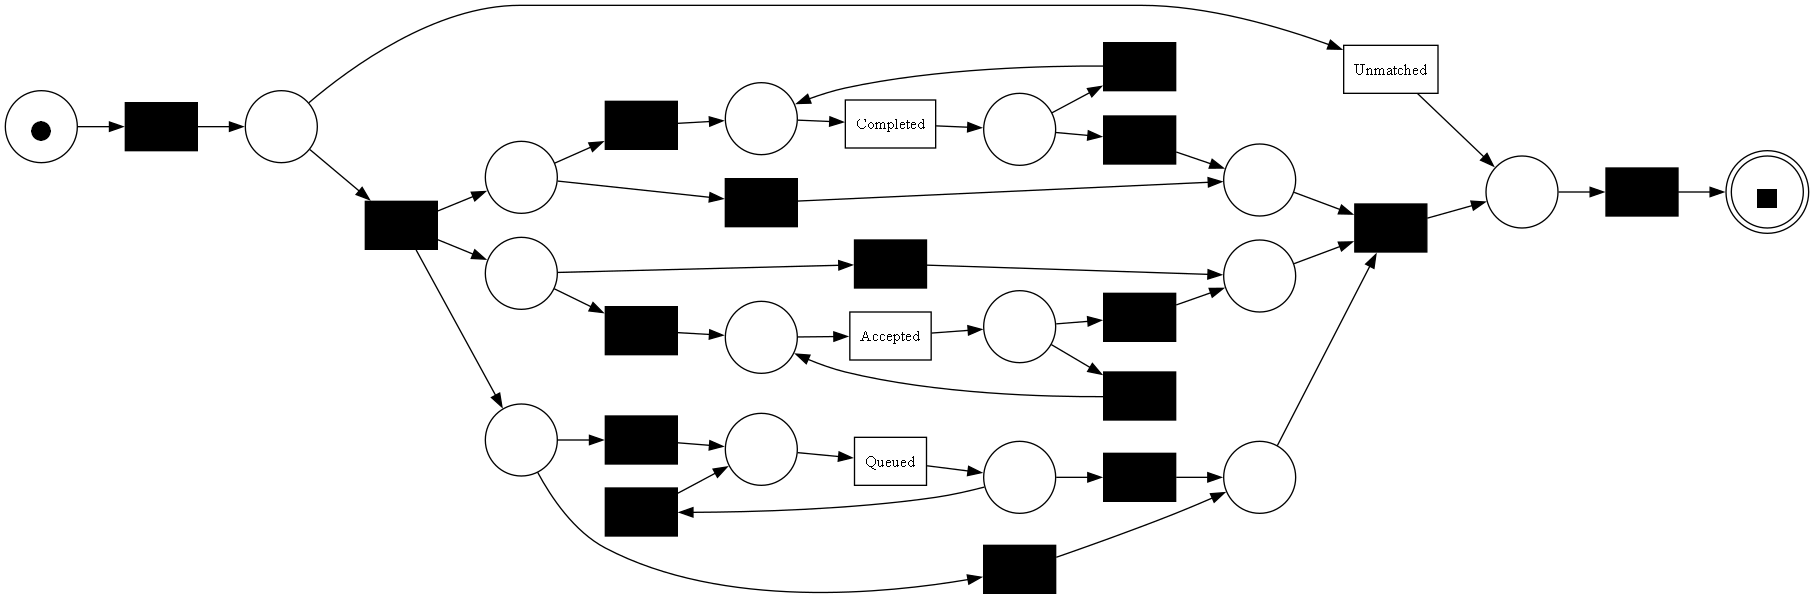

Petri net visualization complete.
Discovery the Petri net with HEURISTIC MINER
Discovering Petri net by Heuristic...

--->Step 4: Checking the properties of the Petri net
Number of places: 8
Number of transitions: 14
Number of arcs: 29
Initial marking: ['source0:1']
Final marking: ['sink0:1']
The petri net is a workflow net?  True
Soundness:  False


computing precision with alignments, completed variants :: 100%|██████████| 118/118 [00:00<00:00, 752.71it/s]


Precision:  0.8340080971659919
Simplicity:  0.6111111111111112


aligning log, completed variants :: 100%|██████████| 26/26 [00:00<00:00, 309.12it/s]


Replay fitness:  {'percFitTraces': 4.2959427207637235, 'averageFitness': 0.7594654613997905, 'percentage_of_fitting_traces': 4.2959427207637235, 'average_trace_fitness': 0.7594654613997905, 'log_fitness': 0.7664200940519559}


replaying log with TBR, completed traces :: 100%|██████████| 92/92 [00:00<00:00, 2817.56it/s]


Generalization:  0.9053829724696454

--->Step 3: Visualize the Petri net


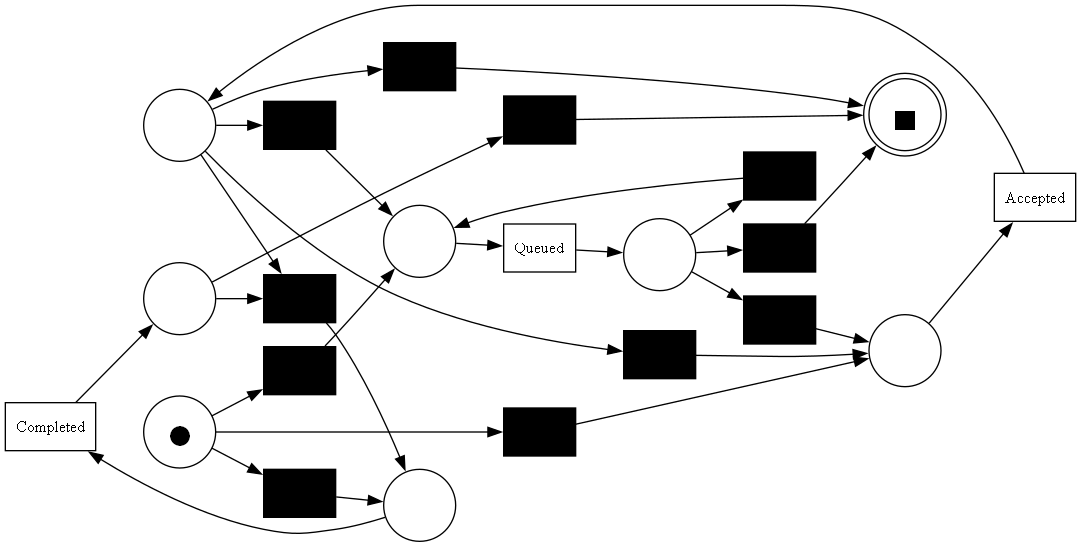

Petri net visualization complete.
Discovery the Petri net with ALPHA MINER
Discovering Petri net by Heuristic...

--->Step 4: Checking the properties of the Petri net
Number of places: 2
Number of transitions: 4
Number of arcs: 8
Initial marking: ['start:1']
Final marking: ['end:1']
The petri net is a workflow net?  True
Soundness:  True


computing precision with alignments, completed variants :: 100%|██████████| 118/118 [00:00<00:00, 3672.93it/s]


Precision:  1.0
Simplicity:  0.6000000000000001


aligning log, completed variants :: 100%|██████████| 26/26 [00:00<00:00, 1469.88it/s]


Replay fitness:  {'percFitTraces': 4.77326968973747, 'averageFitness': 0.498512717938771, 'percentage_of_fitting_traces': 4.77326968973747, 'average_trace_fitness': 0.498512717938771, 'log_fitness': 0.452972972972973}


replaying log with TBR, completed traces :: 100%|██████████| 92/92 [00:00<00:00, 4109.09it/s]

Generalization:  0.9232365956001132

--->Step 3: Visualize the Petri net


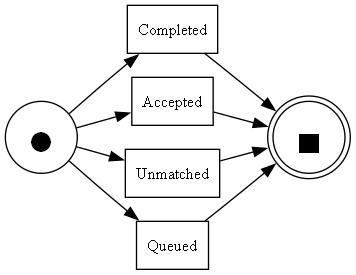

Petri net visualization complete.


In [23]:
print("Process Mining with PM4Py: Discovering a Petri net from an event log AFTER PREPROCESSING")

# Import the event log
event_log = GPT_event_log
(event_log_train, event_log_test) = pm4py.ml.split_train_test(event_log)

# Discover the Petri net with INDUCTIVE MINER
print("Discovery the Petri net with INDUCTIVE MINER")
net, initial_marking, final_marking = discover_petri_net_inductive(event_log_train)
# Check the properties of the Petri net 
checking_petri_net_properties(net, initial_marking, final_marking, event_log_test)
# Visualize the Petri net
visualize_petri_net(net, initial_marking, final_marking)

# Discovery the Petri net with HEURISTIC MINER
print("Discovery the Petri net with HEURISTIC MINER")
net, initial_marking, final_marking = discover_petri_net_Heuristic(event_log_train)
# Check the properties of the Petri net
checking_petri_net_properties(net, initial_marking, final_marking, event_log_test)
# Visualize the Petri net
visualize_petri_net(net, initial_marking, final_marking)

# Discovery the Petri net with ALPHA MINER
print("Discovery the Petri net with ALPHA MINER")
net, initial_marking, final_marking = discover_petri_net_alpha(event_log_train)
# Check the properties of the Petri net
checking_petri_net_properties(net, initial_marking, final_marking, event_log_test)
# Visualize the Petri net
visualize_petri_net(net, initial_marking, final_marking)